In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



In [91]:
# Loading the dataset
excel_file = 'German Credit Data.xlsx'
df = pd.read_excel(excel_file)

# Mapping dictionary for attribute values
attribute_mapping = {
    'A11': '< 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '... >= 200 DM / salary assignments for at least 1 year',
    'A14': 'no checking account',
    'A30': 'no credits taken/ all credits paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/ other credits existing (not at this bank)',
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others',
    'A61': '< 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '... >= 1000 DM',
    'A65': 'unknown/ no savings account',
    'A71': 'unemployed',
    'A72': '< 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '... >= 7 years',
    'A91': 'male : divorced/separated',
    'A92': 'female : divorced/separated/married',
    'A93': 'male : single',
    'A94': 'male : married/widowed',
    'A95': 'female : single',
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor',
    'A121': 'real estate',
    'A122': 'building society savings agreement/ life insurance',
    'A123': 'car or other, not in attribute 6',
    'A124': 'unknown / no property',
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none',
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free',
    'A171': 'unemployed/ unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee / official',
    'A174': 'management/ self-employed/ highly qualified employee/ officer',
    'A191': 'none',
    'A192': 'yes, registered under the customers name',
    'A201': 'yes',
    'A202': 'no'
}

# Replacing values in the dataframe
df.replace(attribute_mapping, inplace=True)

In [92]:
# Dropping non-numeric columns for simplicity (you can preprocess them accordingly)
df_numeric = df.select_dtypes(include='number').copy()

In [93]:
# Separating features and target variable
X = df_numeric.drop(columns=['Outcome'])
y = df_numeric['Outcome']

In [94]:
# Training Random Forest model to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [95]:
# Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importance = feature_importance.sort_values(ascending=False)
print("Feature Importance:\n", sorted_importance)

Feature Importance:
 Credit amount                                               0.341069
Age                                                         0.245198
Duration                                                    0.188137
Present residence since                                     0.077849
Installment rate in percentage of disposable income         0.072314
Number of existing credits at this bank                     0.046798
Number of people being liable to provide maintenance for    0.028635
dtype: float64


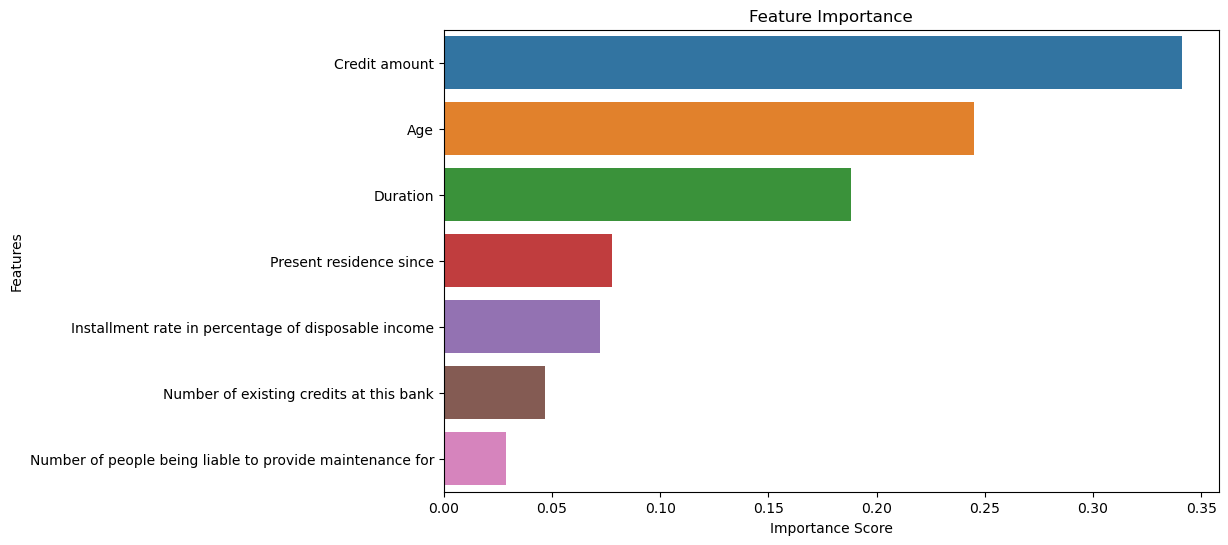

In [96]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


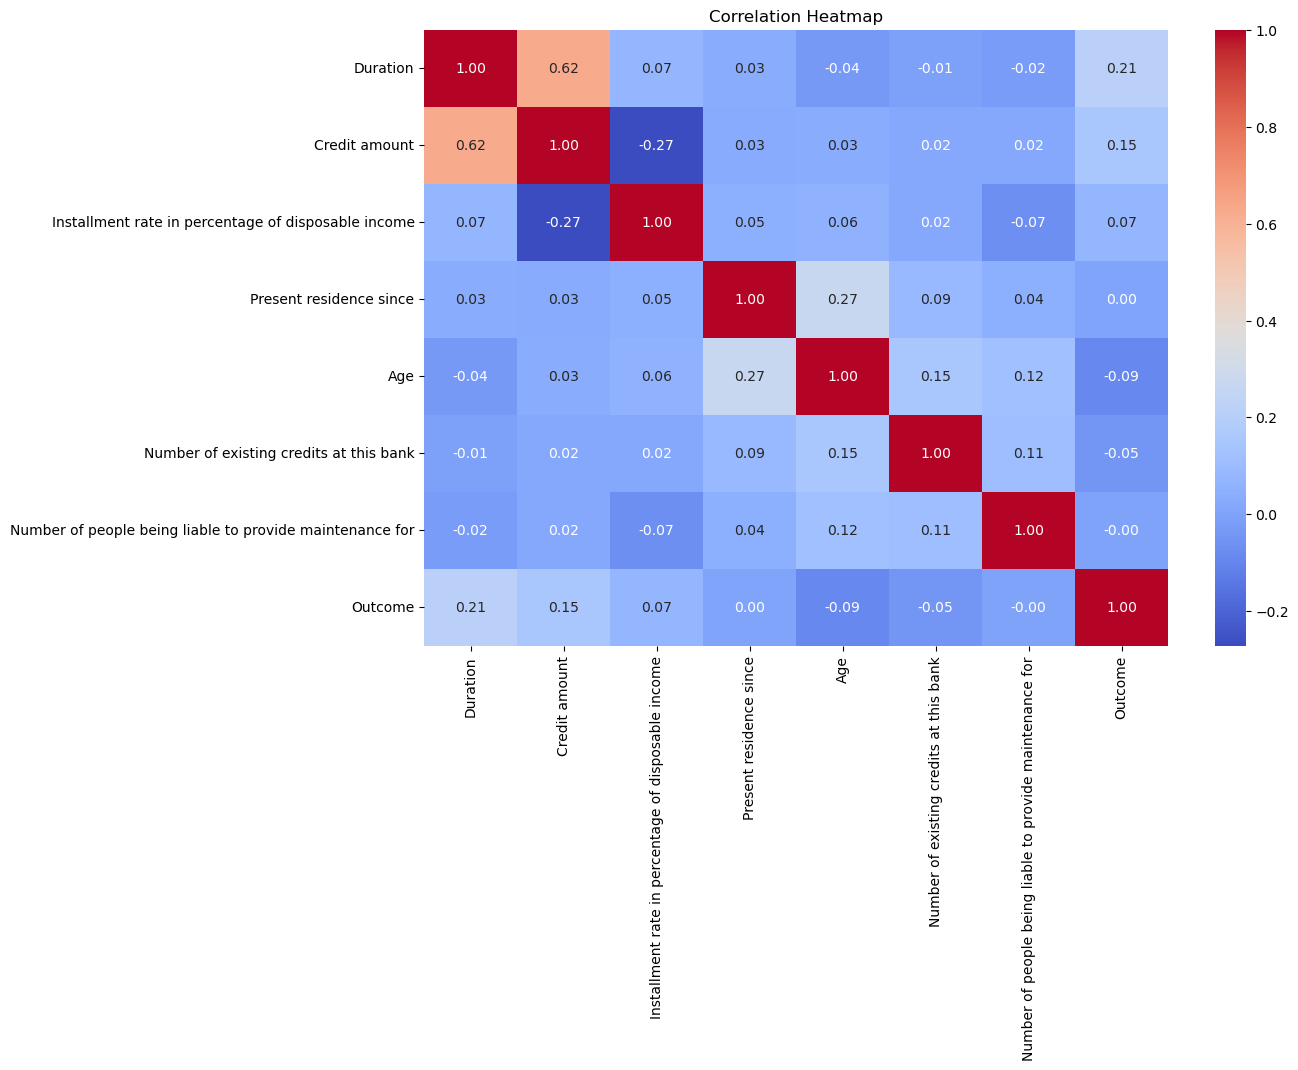

In [97]:
# Correlation Analysis
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [98]:
# Categorical Variables: ANOVA Test
categorical_vars = ['Status of existing checking account', 'Credit history', 'Purpose', 
                    'Savings account/bonds', 'Present employment since', 'Personal status and sex', 
                    'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 
                    'Job', 'Telephone', 'foreign worker']

anova_results = {}
for cat_var in categorical_vars:
    groups = []
    for group_name, group_data in df.groupby(cat_var):
        groups.append(group_data['Outcome'])
    anova_result = f_oneway(*groups)
    anova_results[cat_var] = anova_result

print("ANOVA results:")
for var, result in anova_results.items():
    print(var, "p-value:", result.pvalue)

# Continuous Variables: Pearson Correlation
continuous_vars = ['Duration', 'Credit amount', 'Installment rate in percentage of disposable income', 
                   'Present residence since', 'Age', 'Number of existing credits at this bank', 
                   'Number of people being liable to provide maintenance for']

correlation_results = {}
for cont_var in continuous_vars:
    correlation, p_value = pearsonr(df[cont_var], df['Outcome'])
    correlation_results[cont_var] = correlation, p_value

print("\nPearson Correlation results:")
for var, result in correlation_results.items():
    print(var, "Correlation:", result[0], "p-value:", result[1])

ANOVA results:
Status of existing checking account p-value: 2.4355625868205897e-28
Credit history p-value: 5.532574368812106e-13
Purpose p-value: 0.00010062415990623936
Savings account/bonds p-value: 2.157599468053148e-07
Present employment since p-value: 0.001000882775540068
Personal status and sex p-value: 0.02211007650889401
Other debtors / guarantors p-value: 0.03601674424453703
Property p-value: 2.594256544869632e-05
Other installment plans p-value: 0.0015935711944159903
Housing p-value: 0.00010556361953257901
Job p-value: 0.5976120514901231
Telephone p-value: 0.2492787112324193
foreign worker p-value: 0.00941192007530607

Pearson Correlation results:
Duration Correlation: 0.21492666544189076 p-value: 6.488049877184756e-12
Credit amount Correlation: 0.15473864110152383 p-value: 8.7975723735284e-07
Installment rate in percentage of disposable income Correlation: 0.07240393725133042 p-value: 0.022035486306949088
Present residence since Correlation: 0.0029671587541552844 p-value: 0.9

In [101]:
# Separate features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [105]:
# Encode categorical variables
categorical_cols = ['Status of existing checking account', 'Credit history', 'Purpose',
                    'Savings account/bonds', 'Present employment since', 'Personal status and sex',
                    'Other debtors / guarantors', 'Property', 'Other installment plans',
                    'Housing', 'Job', 'Telephone', 'foreign worker']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Feature selection using RFE with Logistic Regression
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)  # Select top 5 features
fit = rfe.fit(X_encoded, y)

# List of selected features
selected_features = X_encoded.columns[fit.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Status of existing checking account_0 <= ... < 200 DM',
       'Status of existing checking account_< 0 DM',
       'Status of existing checking account_no checking account',
       'Credit history_all credits at this bank paid back duly',
       'Credit history_critical account/ other credits existing (not at this bank)',
       'Credit history_no credits taken/ all credits paid back duly',
       'Purpose_education', 'Purpose_retraining',
       'Other debtors / guarantors_guarantor', 'foreign worker_no'],
      dtype='object')


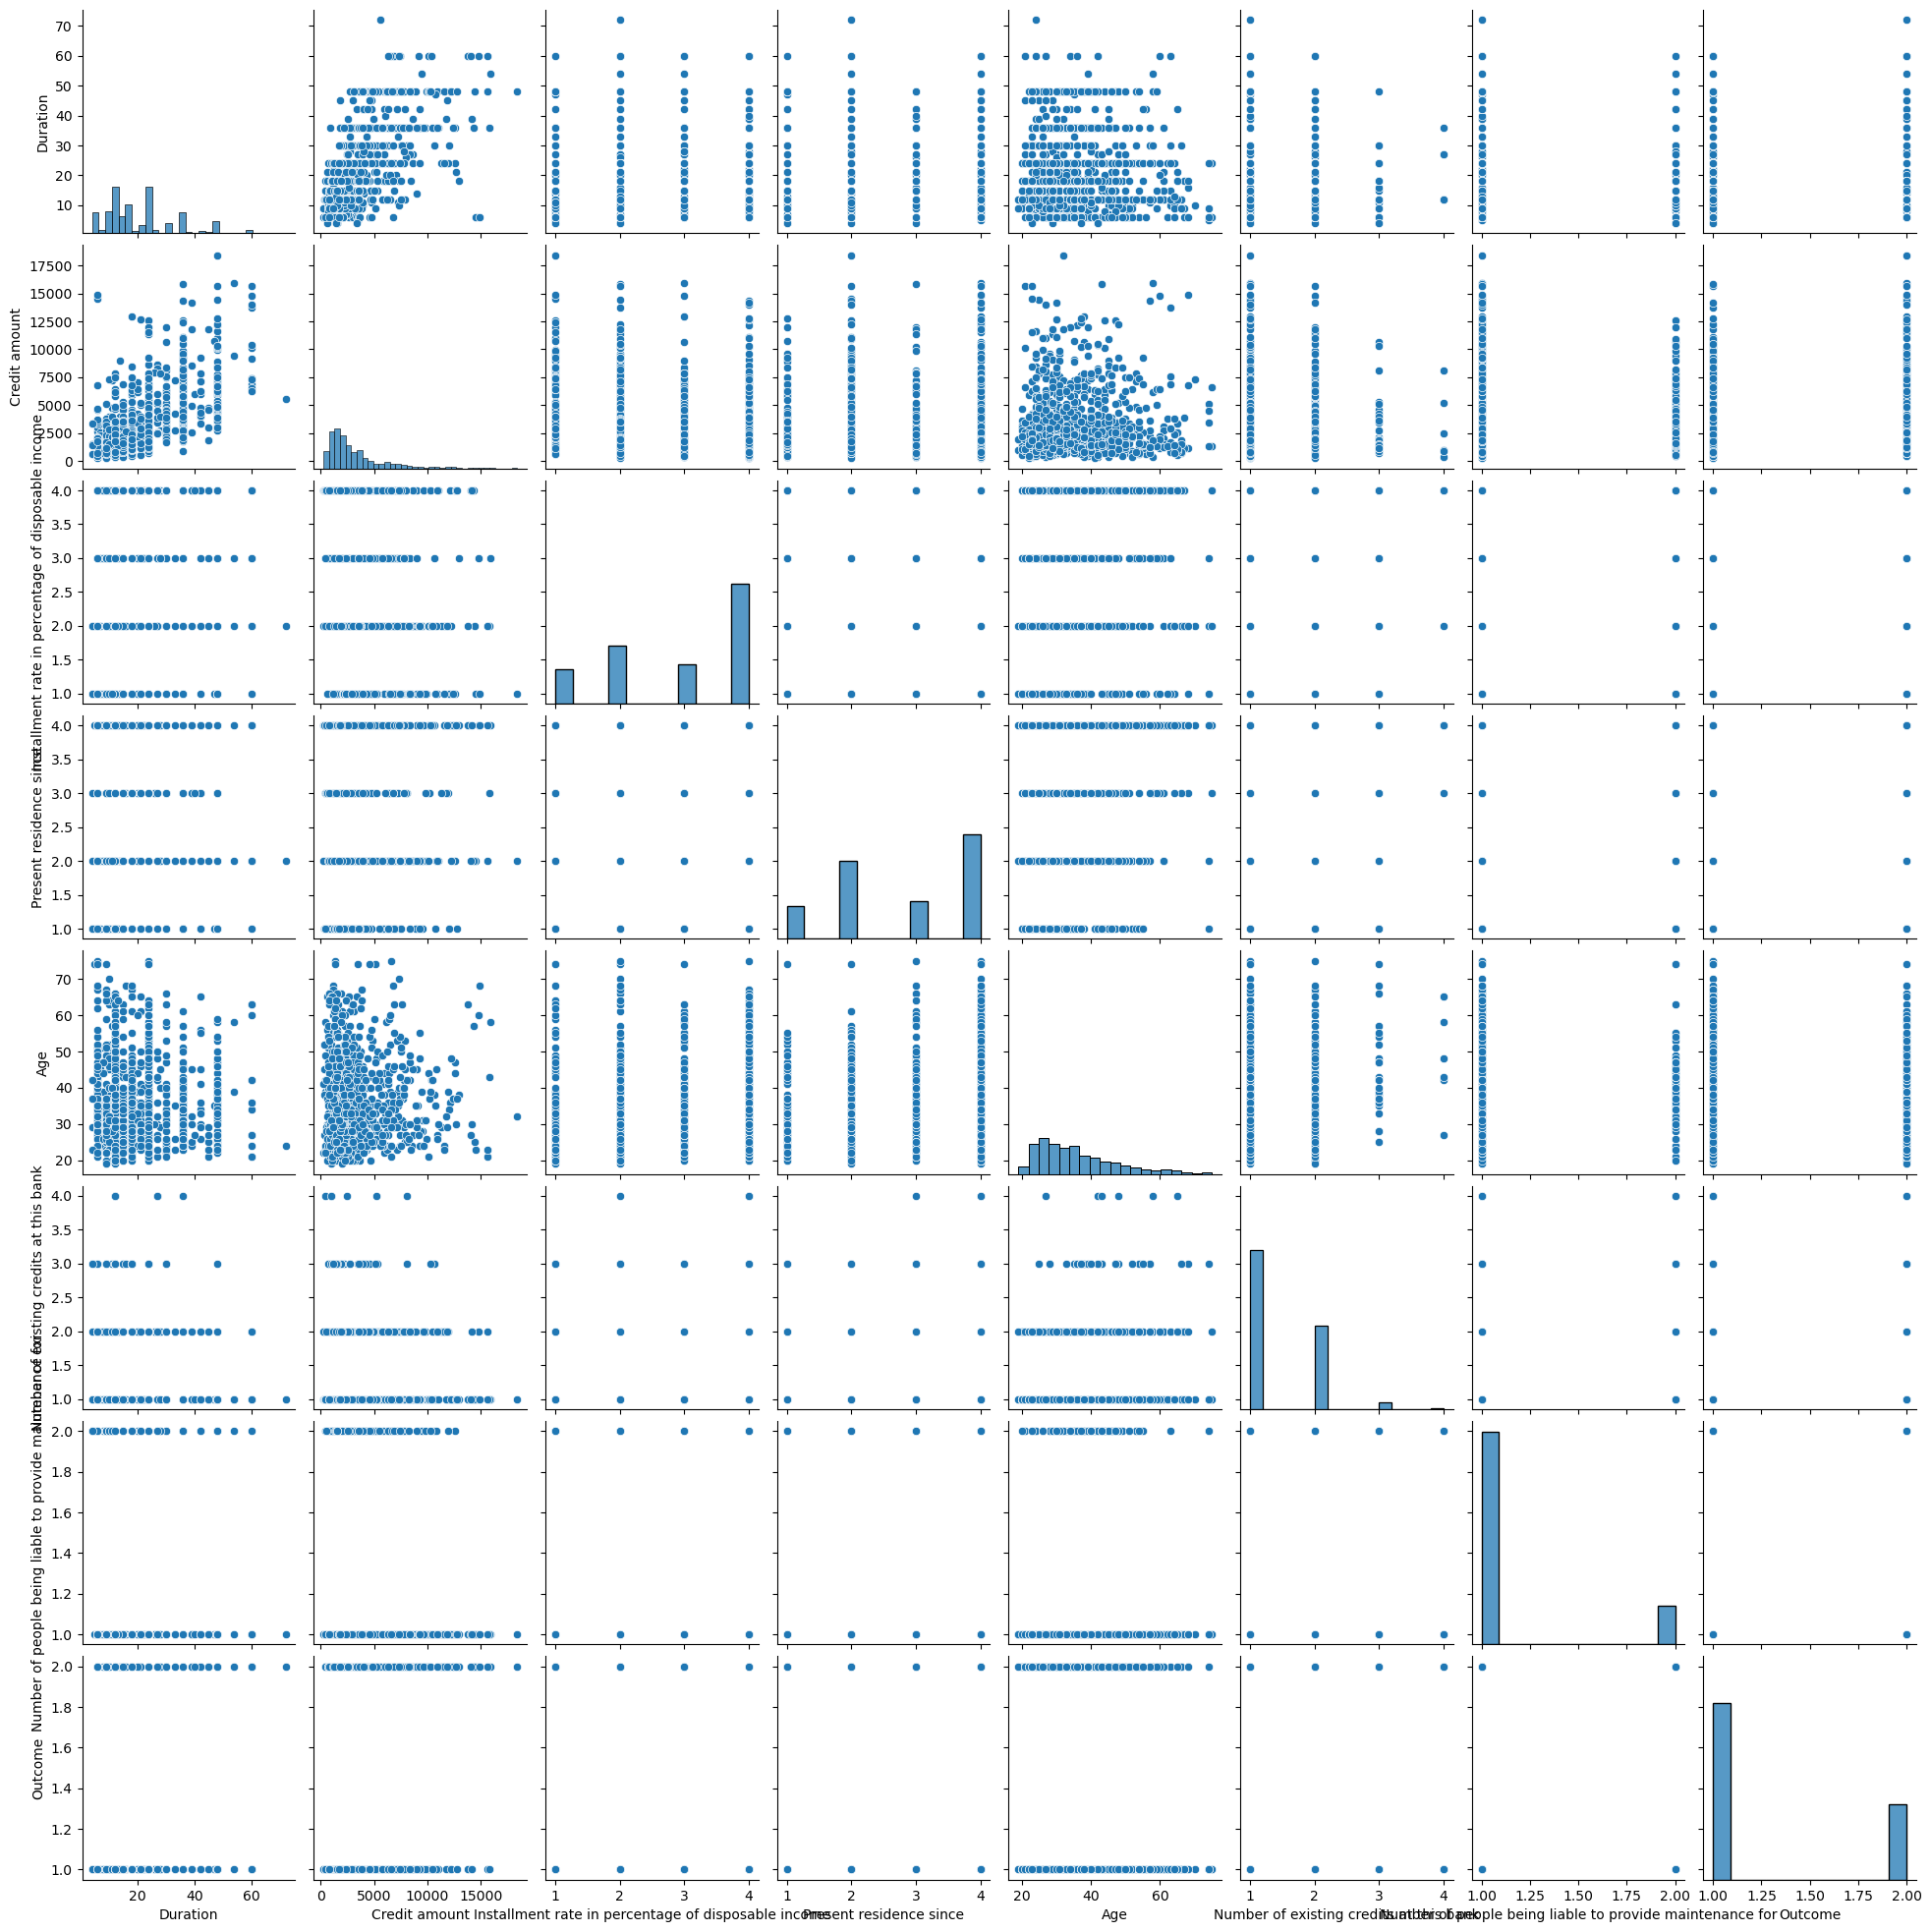

In [107]:
# Remove non-numeric columns for simplicity (you can preprocess them accordingly)
df_numeric = df.select_dtypes(include='number').copy()

# Plot
sns.pairplot(df_numeric)
plt.show()

In [108]:
# Display overview of the data
for column in df.columns:
    if df[column].dtype == 'O':  # Check if the column is categorical (object type)
        print("Attribute:", column)
        print(df[column].value_counts(normalize=True) * 100)
        print()

Attribute: Status of existing checking account
no checking account                                       39.4
< 0 DM                                                    27.4
0 <= ... < 200 DM                                         26.9
... >= 200 DM / salary assignments for at least 1 year     6.3
Name: Status of existing checking account, dtype: float64

Attribute: Credit history
existing credits paid back duly till now                       53.0
critical account/ other credits existing (not at this bank)    29.3
delay in paying off in the past                                 8.8
all credits at this bank paid back duly                         4.9
no credits taken/ all credits paid back duly                    4.0
Name: Credit history, dtype: float64

Attribute: Purpose
radio/television       28.0
car (new)              23.4
furniture/equipment    18.1
car (used)             10.3
business                9.7
education               5.0
repairs                 2.2
domestic appliances    